Since our data is time series, we must:
    1. Perform 31-day sliding window min-max scaling
    2. Create a 0-1 binary predictor variables on whether the coin was pumped

In [1]:
import os, sys
import pandas as pd 
import numpy as np
import requests 
from datetime import datetime, date, time, timedelta
import pytz
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from mpl_finance import candlestick_ohlc
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.ticker as mticker
import pickle
pd.set_option('display.max_columns', 999)
%load_ext autoreload
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
print(os.getcwd())

/Users/hn/Documents/USC Others/ISI Research/PumpCoin/CrytoCompare/All_Pump_Analysis/Final_Analysis


# PART 1: SLIDING WINDOW NORMALIZATION

### GENERAL PROCEDURE FOR WINDOW NORMALIZATION
1. Iterate through row
2. For each of the group of variables (x_d0 to x_d31), apply the function
3. This returns an aray, keep appending them until we have the entire array
4. Append the un-scaled features, and now have a complete row
5. Keep stackign them to a blank array

# HOURLY

In [5]:
d = pd.read_pickle('social_data_training_h.pkl').reset_index(drop=True)

In [6]:
print("Original Social Data has shape: ", d.shape)

Original Social Data has shape:  (59286, 1623)


In [7]:
cd = pd.read_pickle("col_dict_h.pkl")
# cd[list(cd.keys())[0]]

In [8]:
def minmax(x, varlist):
    x_t = x.T
    scaler = MinMaxScaler()
    scaler.fit(x_t)
    r = scaler.transform(x_t)
    return pd.DataFrame(r.T, columns=varlist)

In [9]:
#create a list of features
social_feat = pd.read_pickle("social_features_h.pkl")
len(social_feat)

1617

In [10]:
orig_cols = list(d.columns)
d_scaled = d[cd['core']]
d_temp = np.zeros(shape=(1,d.shape[1]))
print("d_temp", d_temp.shape)


for k,v in cd.items():
    if k != 'core':
        for i in v:
            #var: the group of variable dx
            var = cd[k][i]
#             print(var)
            d_temp = minmax(d[var], var)
#             print(d_temp.shape, type(d_temp))
            d_scaled = pd.concat((d_scaled,d_temp),axis=1)

d_temp (1, 1623)


In [11]:
#Verify that the scaled dataset has the same shape as the original
d_scaled.shape

(59286, 1623)

###  PLOT THE VARIABLE GROUPS TO MAKE SURE THE SCALED ARE THE SAME
Check that the plots are essential the same, just with range normalized between and 0 and 1

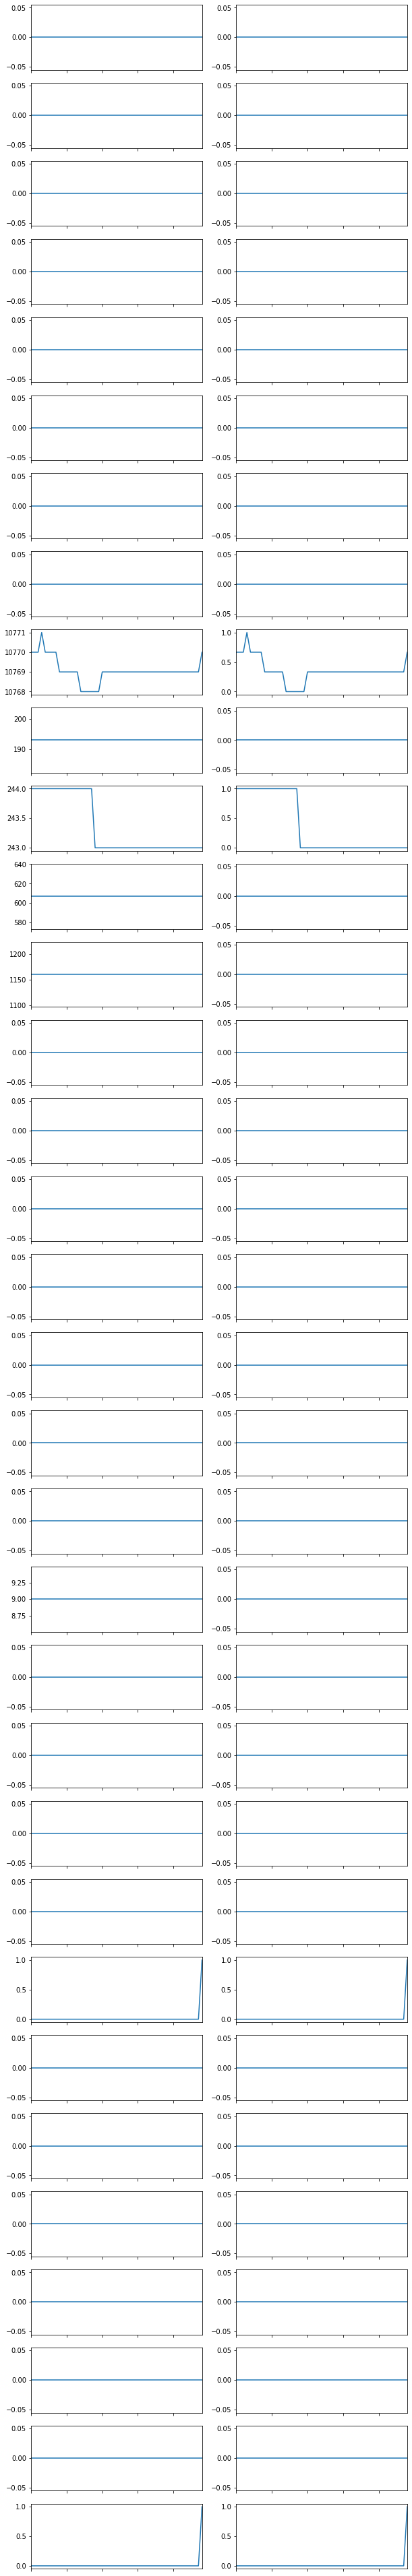

In [12]:
#Select a random show
r = d_scaled.sample(1)
cnt = 0
ix = np.random.randint(0,high=8e4,size=1,dtype=int)
s = d.loc[ix]
s2 = d_scaled.loc[ix]
fig = plt.figure(figsize=(10,70))
for k,v in cd.items():
    if k != 'core':
        for i in v:
            var = cd[k][i]
            ax1 = fig.add_subplot(33,2,cnt*2+1)

            ax1 = s.iloc[0][var].plot()
            ax1.set_xticklabels([])
            ax2 =fig.add_subplot(33,2,cnt*2+2)
            ax2 = s2.iloc[0][var].plot()
            ax2.set_xticklabels([])
            cnt+=1

In [13]:
d_scaled.head()

,currency,exchange,timestamp,pumptime_edited,coin_name,coin_id,code_repo_stars_h0,code_repo_stars_h1,code_repo_stars_h2,code_repo_stars_h3,code_repo_stars_h4,code_repo_stars_h5,code_repo_stars_h6,code_repo_stars_h7,code_repo_stars_h8,code_repo_stars_h9,code_repo_stars_h10,code_repo_stars_h11,code_repo_stars_h12,code_repo_stars_h13,code_repo_stars_h14,code_repo_stars_h15,code_repo_stars_h16,code_repo_stars_h17,code_repo_stars_h18,code_repo_stars_h19,code_repo_stars_h20,code_repo_stars_h21,code_repo_stars_h22,code_repo_stars_h23,code_repo_stars_h24,code_repo_stars_h25,code_repo_stars_h26,code_repo_stars_h27,code_repo_stars_h28,code_repo_stars_h29,code_repo_stars_h30,code_repo_stars_h31,code_repo_stars_h32,code_repo_stars_h33,code_repo_stars_h34,code_repo_stars_h35,code_repo_stars_h36,code_repo_stars_h37,code_repo_stars_h38,code_repo_stars_h39,code_repo_stars_h40,code_repo_stars_h41,code_repo_stars_h42,code_repo_stars_h43,code_repo_stars_h44,code_repo_stars_h45,code_repo_stars_h46,code_repo_stars_h47,code_repo_stars_h48,code_repo_forks_h0,code_repo_forks_h1,code_repo_forks_h2,code_repo_forks_h3,code_repo_forks_h4,code_repo_forks_h5,code_repo_forks_h6,code_repo_forks_h7,code_repo_forks_h8,code_repo_forks_h9,code_repo_forks_h10,code_repo_forks_h11,code_repo_forks_h12,code_repo_forks_h13,code_repo_forks_h14,code_repo_forks_h15,code_repo_forks_h16,code_repo_forks_h17,code_repo_forks_h18,code_repo_forks_h19,code_repo_forks_h20,code_repo_forks_h21,code_repo_forks_h22,code_repo_forks_h23,code_repo_forks_h24,code_repo_forks_h25,code_repo_forks_h26,code_repo_forks_h27,code_repo_forks_h28,code_repo_forks_h29,code_repo_forks_h30,code_repo_forks_h31,code_repo_forks_h32,code_repo_forks_h33,code_repo_forks_h34,code_repo_forks_h35,code_repo_forks_h36,code_repo_forks_h37,code_repo_forks_h38,code_repo_forks_h39,code_repo_forks_h40,code_repo_forks_h41,code_repo_forks_h42,code_repo_forks_h43,code_repo_forks_h44,code_repo_forks_h45,code_repo_forks_h46,code_repo_forks_h47,code_repo_forks_h48,code_repo_subscribers_h0,code_repo_subscribers_h1,code_repo_subscribers_h2,code_repo_subscribers_h3,code_repo_subscribers_h4,code_repo_subscribers_h5,code_repo_subscribers_h6,code_repo_subscribers_h7,code_repo_subscribers_h8,code_repo_subscribers_h9,code_repo_subscribers_h10,code_repo_subscribers_h11,code_repo_subscribers_h12,code_repo_subscribers_h13,code_repo_subscribers_h14,code_repo_subscribers_h15,code_repo_subscribers_h16,code_repo_subscribers_h17,code_repo_subscribers_h18,code_repo_subscribers_h19,code_repo_subscribers_h20,code_repo_subscribers_h21,code_repo_subscribers_h22,code_repo_subscribers_h23,code_repo_subscribers_h24,code_repo_subscribers_h25,code_repo_subscribers_h26,code_repo_subscribers_h27,code_repo_subscribers_h28,code_repo_subscribers_h29,code_repo_subscribers_h30,code_repo_subscribers_h31,code_repo_subscribers_h32,code_repo_subscribers_h33,code_repo_subscribers_h34,code_repo_subscribers_h35,code_repo_subscribers_h36,code_repo_subscribers_h37,code_repo_subscribers_h38,code_repo_subscribers_h39,code_repo_subscribers_h40,code_repo_subscribers_h41,code_repo_subscribers_h42,code_repo_subscribers_h43,code_repo_subscribers_h44,code_repo_subscribers_h45,code_repo_subscribers_h46,code_repo_subscribers_h47,code_repo_subscribers_h48,code_repo_contributors_h0,code_repo_contributors_h1,code_repo_contributors_h2,code_repo_contributors_h3,code_repo_contributors_h4,code_repo_contributors_h5,code_repo_contributors_h6,code_repo_contributors_h7,code_repo_contributors_h8,code_repo_contributors_h9,code_repo_contributors_h10,code_repo_contributors_h11,code_repo_contributors_h12,code_repo_contributors_h13,code_repo_contributors_h14,code_repo_contributors_h15,code_repo_contributors_h16,code_repo_contributors_h17,code_repo_contributors_h18,code_repo_contributors_h19,code_repo_contributors_h20,code_repo_contributors_h21,code_repo_contributors_h22,code_repo_contributors_h23,code_repo_contributors_h24,code_repo_contributors_h25,code_repo_contributors_h26,code_repo_cont

In [14]:
d_scaled['pumped_yn'] = 0
d_scaled.loc[d_scaled.currency == d_scaled.coin_name, 'pumped_yn'] = 1

In [15]:
d_scaled.head(10)[['currency','coin_name','pumped_yn']]

,currency,coin_name,pumped_yn
0,***,ELF,0
1,***,AGI,0
2,***,EVX,0
3,***,BLZ,0
4,***,NPXS,0
5,***,ADX,0
6,***,REN,0
7,***,STORJ,0
8,***,MITH,0
9,***,PAX,0


# SAVE

In [16]:
d_scaled.to_pickle("social_data_slide_scaled_h.pkl")